# Problems:

    1.How different regions of Brazil saw their gas prices change?

    2.Within a region, which states increased more their prices?

    3.Which states are the cheapest (or most expensive) for different types of fuels?


In [1]:
import pandas as pd
import csv
from pandas import DataFrame 
from tabulate import tabulate 
import plotly.plotly as py
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

In [2]:
df = DataFrame.from_csv("2004-2019.tsv", sep="\t")

C:\Users\Lukasz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls



In [3]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


### let's translate columns for english to better understand the dataset

In [4]:
df.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'MÊS',
       'ANO'],
      dtype='object')

In [5]:
df.rename(
    columns={
        'DATA INICIAL': 'initial_date',
        'DATA FINAL': 'end_date', 
        'REGIÃO': 'regions', 
        'ESTADO': 'state', 
        'PRODUTO': 'product',
        'NÚMERO DE POSTOS PESQUISADOS': 'number_gas_station', 
        'UNIDADE DE MEDIDA': 'unit',
        'PREÇO MÉDIO REVENDA': 'mean_market_price', 
        'DESVIO PADRÃO REVENDA': 'sd_market_price', 
        'PREÇO MÍNIMO REVENDA': 'min_market_price',
        'PREÇO MÁXIMO REVENDA': 'max_market_price', 
        'MARGEM MÉDIA REVENDA': 'mean_price_margin',
        'COEF DE VARIAÇÃO REVENDA': 'coef_variance_market_price', 
        'PREÇO MÉDIO DISTRIBUIÇÃO': 'mean_dist_price',
        'DESVIO PADRÃO DISTRIBUIÇÃO': 'sd_distribution_price', 
        'PREÇO MÍNIMO DISTRIBUIÇÃO': 'min_distribution_price',
        'PREÇO MÁXIMO DISTRIBUIÇÃO': 'max_distribution_price', 
        'COEF DE VARIAÇÃO DISTRIBUIÇÃO': 'coeff_variance_distribution_price', 
        'MÊS': 'month',
        'ANO': 'year'
    },
    inplace = True)

In [6]:
df.head()

,initial_date,end_date,regions,state,product,number_gas_station,unit,mean_market_price,sd_market_price,min_market_price,max_market_price,mean_price_margin,coef_variance_market_price,mean_dist_price,sd_distribution_price,min_distribution_price,max_distribution_price,coeff_variance_distribution_price,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [7]:
df.dtypes

initial_date                          object
end_date                              object
regions                               object
state                                 object
product                               object
number_gas_station                     int64
unit                                  object
mean_market_price                    float64
sd_market_price                      float64
min_market_price                     float64
max_market_price                     float64
mean_price_margin                     object
coef_variance_market_price           float64
mean_dist_price                       object
sd_distribution_price                 object
min_distribution_price                object
max_distribution_price                object
coeff_variance_distribution_price     object
month                                  int64
year                                   int64
dtype: object

In [8]:
df['initial_date'] = pd.to_datetime(df['initial_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [9]:
df.dtypes

initial_date                         datetime64[ns]
end_date                             datetime64[ns]
regions                                      object
state                                        object
product                                      object
number_gas_station                            int64
unit                                         object
mean_market_price                           float64
sd_market_price                             float64
min_market_price                            float64
max_market_price                            float64
mean_price_margin                            object
coef_variance_market_price                  float64
mean_dist_price                              object
sd_distribution_price                        object
min_distribution_price                       object
max_distribution_price                       object
coeff_variance_distribution_price            object
month                                         int64
year        

### Check up what the data we have

In [10]:
df.shape

(106823, 20)

In [11]:
df.count()

initial_date                         106823
end_date                             106823
regions                              106823
state                                106823
product                              106823
number_gas_station                   106823
unit                                 106823
mean_market_price                    106823
sd_market_price                      106823
min_market_price                     106823
max_market_price                     106823
mean_price_margin                    106823
coef_variance_market_price           106823
mean_dist_price                      106823
sd_distribution_price                106823
min_distribution_price               106823
max_distribution_price               106823
coeff_variance_distribution_price    106823
month                                106823
year                                 106823
dtype: int64

In [12]:
df.isnull().sum()

initial_date                         0
end_date                             0
regions                              0
state                                0
product                              0
number_gas_station                   0
unit                                 0
mean_market_price                    0
sd_market_price                      0
min_market_price                     0
max_market_price                     0
mean_price_margin                    0
coef_variance_market_price           0
mean_dist_price                      0
sd_distribution_price                0
min_distribution_price               0
max_distribution_price               0
coeff_variance_distribution_price    0
month                                0
year                                 0
dtype: int64

In [13]:
df['regions'].value_counts()

NORDESTE        36869
NORTE           24702
SUDESTE         17047
CENTRO OESTE    15429
SUL             12776
Name: regions, dtype: int64

In [14]:
df['state'].value_counts()

PARAIBA                4263
SAO PAULO              4263
BAHIA                  4263
RIO DE JANEIRO         4263
CEARA                  4263
RIO GRANDE DO SUL      4263
RIO GRANDE DO NORTE    4262
SANTA CATARINA         4262
PERNAMBUCO             4262
MINAS GERAIS           4261
ESPIRITO SANTO         4260
SERGIPE                4259
PARANA                 4251
ALAGOAS                4250
MATO GROSSO DO SUL     4246
MATO GROSSO            4037
AMAZONAS               3889
GOIAS                  3663
PIAUI                  3548
MARANHAO               3499
PARA                   3497
DISTRITO FEDERAL       3483
TOCANTINS              3483
ACRE                   3480
RONDONIA               3479
RORAIMA                3471
AMAPA                  3403
Name: state, dtype: int64

In [15]:
df['product'].value_counts()

GASOLINA COMUM      21194
ÓLEO DIESEL         21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: product, dtype: int64

In [16]:
df['unit'].value_counts()

R$/l       72603
R$/13Kg    21186
R$/m3      13034
Name: unit, dtype: int64

In [17]:
df['year'].value_counts()

2017    7990
2014    7932
2013    7921
2016    7873
2018    7823
2015    7771
2012    6634
2006    6598
2010    6489
2011    6487
2007    6475
2008    6453
2009    6232
2005    6186
2004    4205
2019    3754
Name: year, dtype: int64

### take a look on units 

In [18]:
df_filtered1 = df[df['unit'] == 'R$/13Kg']
df_filtered1['product'].value_counts()

GLP    21186
Name: product, dtype: int64

GLP has R$/13Kg format unit 

In [19]:
df_filtered2 = df[df['unit'] == 'R$/m3']
df_filtered2['product'].value_counts()

GNV    13034
Name: product, dtype: int64

GNV has R$/m3 format unit

#### let's separate data as: 'without glp' and 'only glp' analayse it
##### because glp is a 13kg buttle, has a diffrent prices

In [20]:
df_without_glp = df.loc[df['unit'] != 'R$/13Kg']
df_without_glp.head()

,initial_date,end_date,regions,state,product,number_gas_station,unit,mean_market_price,sd_market_price,min_market_price,max_market_price,mean_price_margin,coef_variance_market_price,mean_dist_price,sd_distribution_price,min_distribution_price,max_distribution_price,coeff_variance_distribution_price,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [21]:
df_only_glp = df.loc[df['unit'] == 'R$/13Kg']
df_only_glp.head()

,initial_date,end_date,regions,state,product,number_gas_station,unit,mean_market_price,sd_market_price,min_market_price,max_market_price,mean_price_margin,coef_variance_market_price,mean_dist_price,sd_distribution_price,min_distribution_price,max_distribution_price,coeff_variance_distribution_price,month,year
24132,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,GLP,44,R$/13Kg,33.989,0.803,32.0,36.0,6.824,0.024,27.165,3.062,25,29.33,0.113,5,2004
24133,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,GLP,372,R$/13Kg,30.335,1.841,27.0,36.0,5.328,0.061,25.007,1.756,19.4983,29,0.07,5,2004
24134,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,GLP,97,R$/13Kg,38.568,2.045,33.0,44.0,5.713,0.053,32.855,2.296,27.75,38,0.07,5,2004
24135,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GLP,109,R$/13Kg,33.388,2.308,29.0,39.0,4.585,0.069,28.803,1.764,24,33,0.061,5,2004
24136,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GLP,22,R$/13Kg,32.391,1.357,27.9,33.0,7.641,0.042,24.75,0.354,24.5,25,0.014,5,2004


### now we can see a diffrence in simply plot which show a distribution mean price


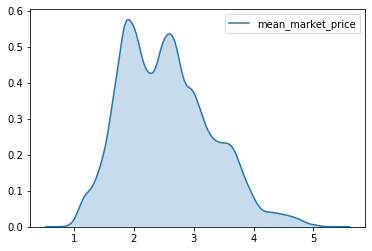

In [22]:
sns.kdeplot(df_without_glp['mean_market_price'], shade=True)

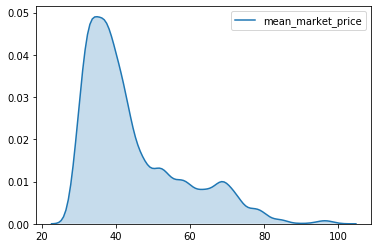

In [23]:
sns.kdeplot(df_only_glp['mean_market_price'], shade=True)

In [24]:
plt.style.use('seaborn-darkgrid')


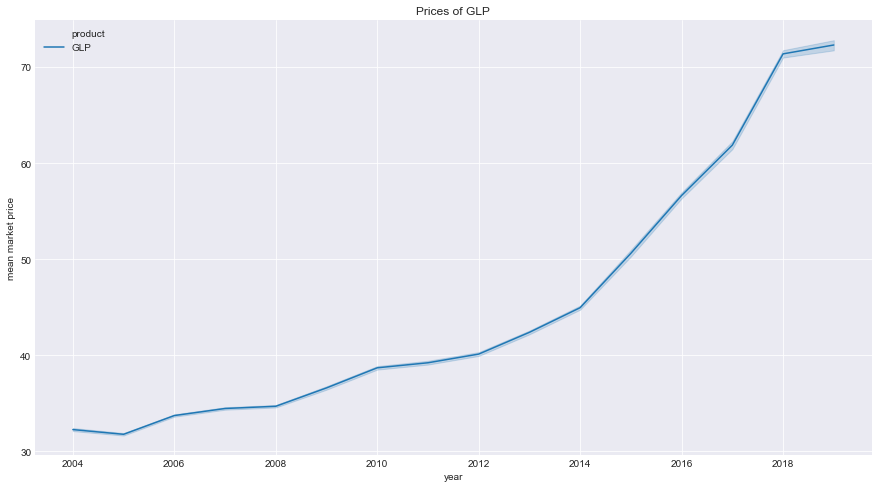

In [25]:
fig, ax = plt.subplots(figsize =(15,8))
sns.lineplot(x='year', y='mean_market_price', data=df_only_glp, hue='product')
ax.set(xlabel='year', ylabel='mean market price', title='Prices of GLP')
plt.show()

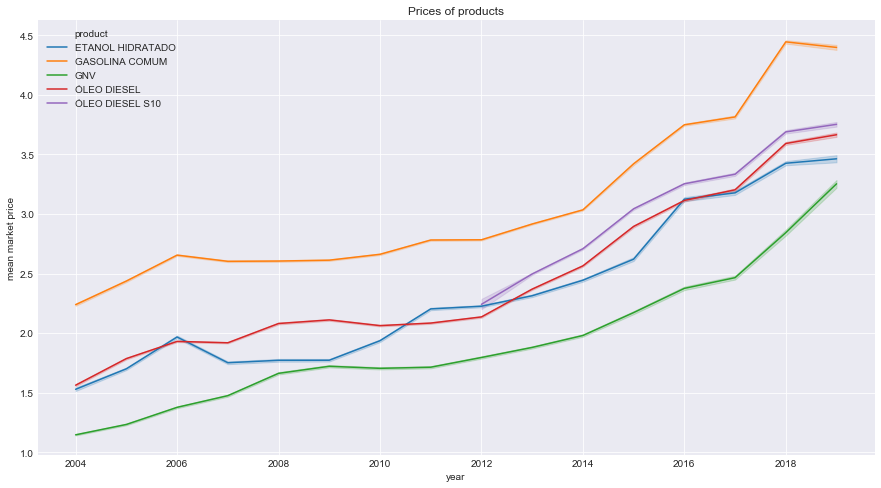

In [26]:
fig, ax = plt.subplots(figsize =(15,8))
sns.lineplot(x='year', y='mean_market_price', data=df_without_glp, hue='product')
ax.set(xlabel='year', ylabel='mean market price', title='Prices of products')
plt.show()

In [27]:
regions_year = df.groupby(['year', 'product', 'regions']).mean()['mean_market_price'].unstack().round(2)
regions_year

regions                CENTRO OESTE  NORDESTE  NORTE  SUDESTE    SUL
year product                                                        
2004 ETANOL HIDRATADO          1.50      1.53   1.74     1.27   1.40
     GASOLINA COMUM            2.29      2.19   2.35     2.13   2.22
     GLP                      33.80     32.07  33.81    29.26  31.14
     GNV                       1.13      1.15    NaN     1.11   1.19
     ÓLEO DIESEL               1.63      1.48   1.67     1.50   1.54
2005 ETANOL HIDRATADO          1.63      1.71   1.90     1.47   1.61
     GASOLINA COMUM            2.50      2.39   2.54     2.30   2.43
     GLP                      33.47     31.07  33.33    29.27  31.30
     GNV                       1.25      1.24   1.38     1.16   1.28
     ÓLEO DIESEL               1.84      1.71   1.89     1.72   1.78
2006 ETANOL HIDRATADO          1.88      1.95   2.17     1.79   1.88
     GASOLINA COMUM            2.72      2.64   2.73     2.53   2.60
     GLP                      35.75     32.85  34.81    31.82  33.63
     GNV                       1.49      1.37   1.40     1.28   1.47
     ÓLEO DIESEL               1.97      1.86   2.06     1.84   1.90
2007 ETANOL HIDRATADO          1.60      1.76   1.95     1.61   1.64
     GASOLINA COMUM            2.68      2.61   2.64     2.51   2.51
     GLP                      36.98     33.12  35.86    32.88  33.92
     GNV                       1.55      1.51   1.40     1.35   1.53
     ÓLEO DIESEL               1.96      1.85   2.04     1.84   1.89
2008 ETANOL HIDRATADO          1.63      1.79   1.99     1.59   1.63
     GASOLINA COMUM            2.63      2.60   2.70     2.51   2.51
     GLP                      36.57     33.54  36.30    32.89  34.25
     GNV                       1.64      1.74   1.49     1.57   1.66
     ÓLEO DIESEL               2.12      2.01   2.21     2.01   2.05
2009 ETANOL HIDRATADO          1.65      1.77   1.97     1.64   1.67
     GASOLINA COMUM            2.66      2.57   2.73     2.51   2.52
     GLP                      40.26     34.95  37.31    35.32  36.72
     GNV                       1.78      1.76   1.77     1.65   1.67
     ÓLEO DIESEL               2.13      2.04   2.25     2.04   2.07
...                             ...       ...    ...      ...    ...
2015 ETANOL HIDRATADO          2.38      2.62   2.87     2.49   2.52
     GASOLINA COMUM            3.42      3.36   3.57     3.37   3.30
     GLP                      54.18     47.49  55.09    47.95  48.38
     GNV                       2.39      2.16   2.29     1.99   2.21
     ÓLEO DIESEL               2.97      2.82   3.06     2.80   2.78
     ÓLEO DIESEL S10           3.12      2.97   3.20     2.95   2.93
2016 ETANOL HIDRATADO          2.83      3.12   3.44     2.91   3.12
     GASOLINA COMUM            3.68      3.73   3.87     3.70   3.67
     GLP                      62.81     52.91  60.77    52.72  55.19
     GNV                       2.52      2.38   2.84     2.19   2.43
     ÓLEO DIESEL               3.19      3.05   3.31     2.99   2.91
     ÓLEO DIESEL S10           3.34      3.17   3.46     3.13   3.05
2017 ETANOL HIDRATADO          2.89      3.13   3.53     2.98   3.21
     GASOLINA COMUM            3.80      3.75   3.92     3.83   3.76
     GLP                      68.44     57.87  66.48    58.25  59.31
     GNV                       2.52      2.53   2.86     2.32   2.40
     ÓLEO DIESEL               3.34      3.11   3.38     3.14   2.99
     ÓLEO DIESEL S10           3.48      3.20   3.54     3.28   3.12
2018 ETANOL HIDRATADO          3.10      3.42   3.73     3.22   3.48
     GASOLINA COMUM            4.46      4.40   4.50     4.53   4.33
     GLP                      78.62     67.18  77.17    65.74  68.47
     GNV                       2.71      2.99   3.14     2.69   2.71
     ÓLEO DIESEL               3.68      3.54   3.77     3.48   3.35
     ÓLEO DIESEL S10           3.79      3.61   3.89     3.60   3.46
2019 ETANOL HIDRATADO          3.06      3.49   3.75     3.29   3.5

##### GNV prices for Norte region doesn't exist in database for 2004

In [28]:
df_without_glp.query('regions == "NORTE" & year == 2004 & product =="GNV"' )

,initial_date,end_date,regions,state,product,number_gas_station,unit,mean_market_price,sd_market_price,min_market_price,max_market_price,mean_price_margin,coef_variance_market_price,mean_dist_price,sd_distribution_price,min_distribution_price,max_distribution_price,coeff_variance_distribution_price,month,year


# How prices of petrol change

#### ETANOL_HIDRATADO

In [29]:
ETANOL_HIDRATADO = df_without_glp.query('product == "ETANOL HIDRATADO" & year >= 2004')

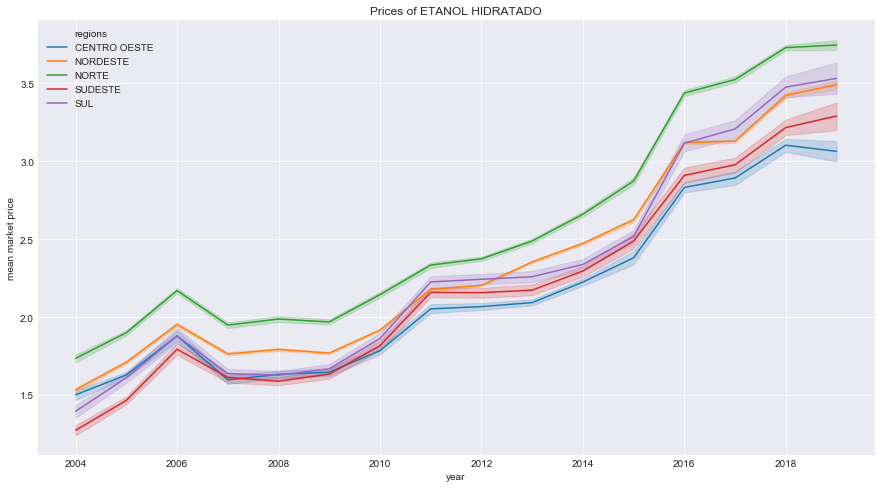

In [30]:
fig, ax = plt.subplots(figsize =(15,8))
sns.lineplot(x='year', y='mean_market_price', data=ETANOL_HIDRATADO, hue='regions')
ax.set(xlabel='year', ylabel='mean market price', title='Prices of ETANOL HIDRATADO')
plt.show()

#### GASOLINA COMUM

In [31]:
GASOLINA_COMUM = df_without_glp.query('product == "GASOLINA COMUM" & year >= 2004')

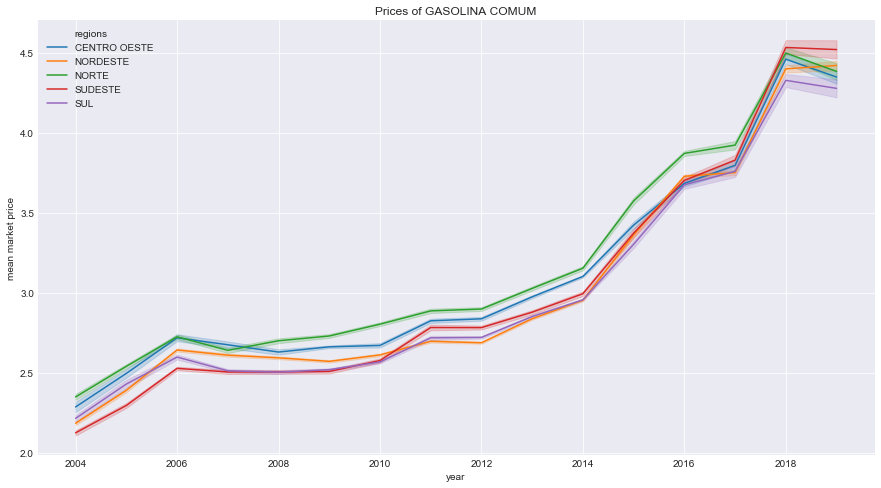

In [32]:
fig, ax = plt.subplots(figsize =(15,8))
sns.lineplot(x='year', y='mean_market_price', data=GASOLINA_COMUM, hue='regions')
ax.set(xlabel='year', ylabel='mean market price', title='Prices of GASOLINA COMUM')
plt.show()

#### GNV

In [33]:
GNV = df_without_glp.query('product == "GNV" & year >= 2004')

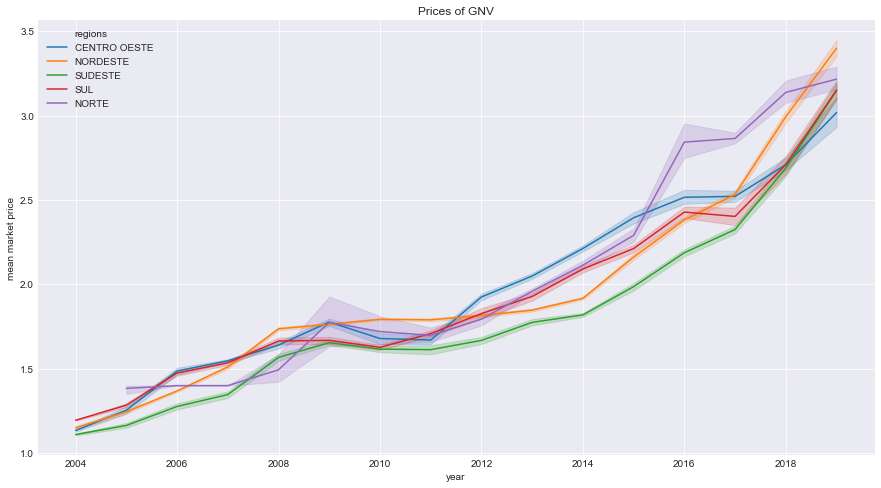

In [34]:
fig, ax = plt.subplots(figsize =(15,8))
sns.lineplot(x='year', y='mean_market_price', data=GNV, hue='regions')
ax.set(xlabel='year', ylabel='mean market price', title='Prices of GNV')
plt.show()

#### ÓLEO DIESEL

In [35]:
OLEO_DIESEL = df_without_glp.query('product == "ÓLEO DIESEL" & year >= 2004')

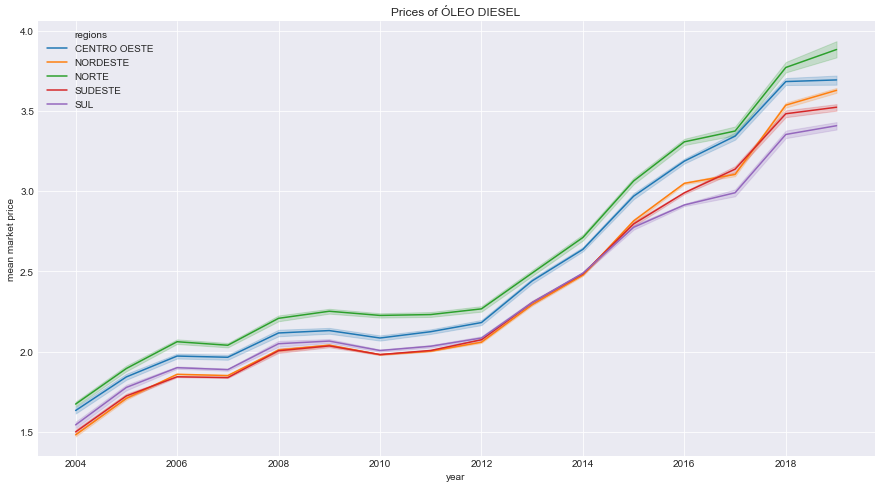

In [36]:
fig, ax = plt.subplots(figsize =(15,8))
sns.lineplot(x='year', y='mean_market_price', data=OLEO_DIESEL, hue='regions')
ax.set(xlabel='year', ylabel='mean market price', title='Prices of ÓLEO DIESEL')
plt.show()

#### ÓLEO DIESEL S10	

In [37]:
OLEO_DIESEL_S10 = df_without_glp.query('product == "ÓLEO DIESEL S10" & year >= 2004')

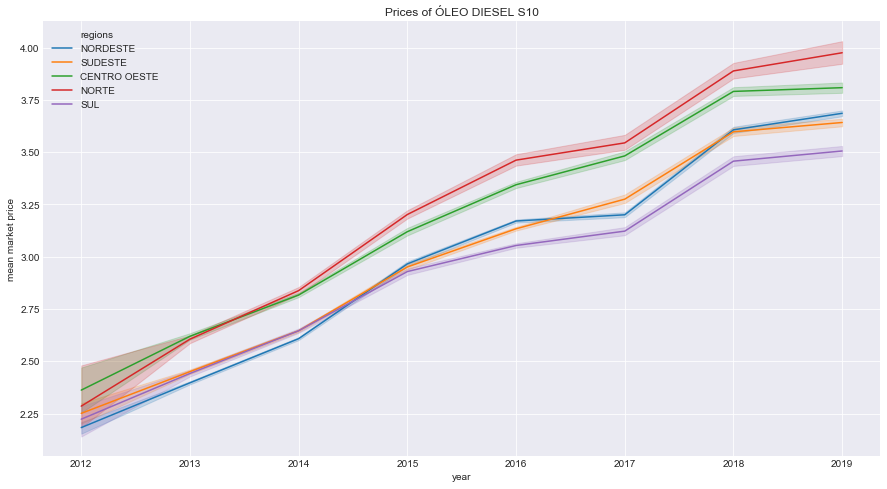

In [38]:
fig, ax = plt.subplots(figsize =(15,8))
sns.lineplot(x='year', y='mean_market_price', data=OLEO_DIESEL_S10, hue='regions')
ax.set(xlabel='year', ylabel='mean market price', title='Prices of ÓLEO DIESEL S10')
plt.show()

#### GLP prices in regions

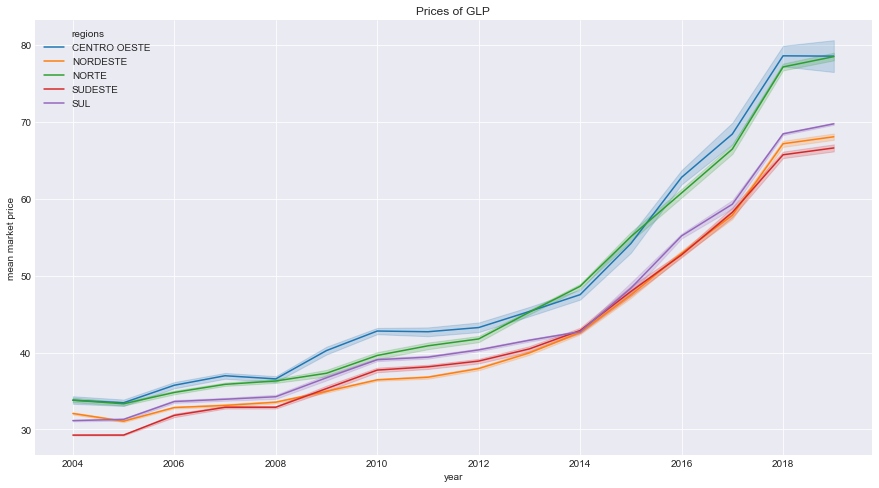

In [39]:
fig, ax = plt.subplots(figsize =(15,8))
sns.lineplot(x='year', y='mean_market_price', data=df_only_glp, hue='regions')
ax.set(xlabel='year', ylabel='mean market price', title='Prices of GLP')
plt.show()

## Problem 01 
### How prices have changed compared 2004 - 2019

In [40]:
diffrence = df.groupby(['regions', 'product', 'year']).mean()['mean_market_price'].unstack().round(2)
diff = diffrence.diff(axis=1)
diff['SUM'] = diff.sum(axis=1)
diff

year                           2004  2005  2006  2007  2008  2009  2010  2011  \
regions      product                                                            
CENTRO OESTE ETANOL HIDRATADO   NaN  0.13  0.25 -0.28  0.03  0.02  0.14  0.26   
             GASOLINA COMUM     NaN  0.21  0.22 -0.04 -0.05  0.03  0.01  0.16   
             GLP                NaN -0.33  2.28  1.23 -0.41  3.69  2.54 -0.09   
             GNV                NaN  0.12  0.24  0.06  0.09  0.14 -0.10 -0.01   
             ÓLEO DIESEL        NaN  0.21  0.13 -0.01  0.16  0.01 -0.05  0.04   
             ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
NORDESTE     ETANOL HIDRATADO   NaN  0.18  0.24 -0.19  0.03 -0.02  0.15  0.26   
             GASOLINA COMUM     NaN  0.20  0.25 -0.03 -0.01 -0.03  0.04  0.09   
             GLP                NaN -1.00  1.78  0.27  0.42  1.41  1.50  0.34   
             GNV                NaN  0.09  0.13  0.14  0.23  0.02  0.03  0.00   
             ÓLEO DIESEL        NaN  0.23  0.15 -0.01  0.16  0.03 -0.06  0.02   
             ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
NORTE        ETANOL HIDRATADO   NaN  0.16  0.27 -0.22  0.04 -0.02  0.18  0.18   
             GASOLINA COMUM     NaN  0.19  0.19 -0.09  0.06  0.03  0.08  0.08   
             GLP                NaN -0.48  1.48  1.05  0.44  1.01  2.31  1.26   
             GNV                NaN   NaN  0.02  0.00  0.09  0.28 -0.05 -0.02   
             ÓLEO DIESEL        NaN  0.22  0.17 -0.02  0.17  0.04 -0.02  0.00   
             ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
SUDESTE      ETANOL HIDRATADO   NaN  0.20  0.32 -0.18 -0.02  0.05  0.18  0.34   
             GASOLINA COMUM     NaN  0.17  0.23 -0.02  0.00  0.00  0.07  0.20   
             GLP                NaN  0.01  2.55  1.06  0.01  2.43  2.40  0.42   
             GNV                NaN  0.05  0.12  0.07  0.22  0.08 -0.03 -0.01   
             ÓLEO DIESEL        NaN  0.22  0.12  0.00  0.17  0.03 -0.06  0.03   
             ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
SUL          ETANOL HIDRATADO   NaN  0.21  0.27 -0.24 -0.01  0.04  0.19  0.37   
             GASOLINA COMUM     NaN  0.21  0.17 -0.09  0.00  0.01  0.05  0.15   
             GLP                NaN  0.16  2.33  0.29  0.33  2.47  2.35  0.33   
             GNV                NaN  0.09  0.19  0.06  0.13  0.01 -0.04  0.08   
             ÓLEO DIESEL        NaN  0.24  0.12 -0.01  0.16  0.02 -0.06  0.02   
             ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

year                           2012  2013  2014  2015  2016  2017   2018  \
regions      product                                                       
CENTRO OESTE ETANOL HIDRATADO  0.02  0.02  0.14  0.15  0.45  0.06   0.21   
             GASOLINA COMUM    0.01  0.14  0.12  0.32  0.26  0.12   0.66   
             GLP               0.55  2.09  2.19  6.64  8.63  5.63  10.18   
             GNV               0.25  0.13  0.16  0.18  0.13  0.00   0.19   
             ÓLEO DIESEL       0.06  0.26  0.20  0.33  0.22  0.15   0.34   
             ÓLEO DIESEL S10    NaN  0.26  0.20  0.30  0.22  0.14   0.31   
NORDESTE     ETANOL HIDRATADO  0.02  0.16  0.11  0.15  0.50  0.01   0.29   
             GASOLINA COMUM   -0.01  0.15  0.11  0.41  0.37  0.02   0.65   
             GLP               1.13  2.03  2.68  4.86  5.42  4.96   9.31   
             GNV               0.02  0.04  0.07  0.24  0.22  0.15   0.46   
             ÓLEO DIESEL       0.06  0.23  0.19  0.34  0.23  0.06   0.43   
             ÓLEO DIESEL S10    NaN  0.22  0.21  0.36  0.20  0.03   0.41   
NORTE        ETANOL HIDRATADO  0.05  0.11  0.17  0.21  0.57  0.09   0.20   
             GASOLINA COMUM    0.01  0.13  0.12  0.42  0.30  0.05   0.58   
             GLP               0.89  3.49  3.37  6.46  5.68  5.71  10.69   
             GNV               0.09  0.17  0.15  0.18  0.55  0.02   0.28   
             ÓLEO DIESEL       0.04  0.

#### Total changed prices from 2004 to 2019

In [41]:
diff['SUM']

regions       product         
CENTRO OESTE  ETANOL HIDRATADO     1.56
              GASOLINA COMUM       2.06
              GLP                 44.78
              GNV                  1.89
              ÓLEO DIESEL          2.06
              ÓLEO DIESEL S10      1.45
NORDESTE      ETANOL HIDRATADO     1.96
              GASOLINA COMUM       2.23
              GLP                 36.01
              GNV                  2.25
              ÓLEO DIESEL          2.15
              ÓLEO DIESEL S10      1.51
NORTE         ETANOL HIDRATADO     2.01
              GASOLINA COMUM       2.03
              GLP                 44.70
              GNV                  1.84
              ÓLEO DIESEL          2.21
              ÓLEO DIESEL S10      1.69
SUDESTE       ETANOL HIDRATADO     2.02
              GASOLINA COMUM       2.39
              GLP                 37.37
              GNV                  2.04
              ÓLEO DIESEL          2.02
              ÓLEO DIESEL S10      1.39
SUL      

## Problem 02

In [42]:
state = df.groupby(['state', 'product', 'year']).mean()['mean_market_price'].unstack().round(2)
state

year                              2004   2005   2006   2007   2008   2009  \
state          product                                                      
ACRE           ETANOL HIDRATADO   1.90   1.95   2.26   2.07   2.10   2.11   
               GASOLINA COMUM     2.53   2.66   2.94   2.92   2.97   2.96   
               GLP               38.18  36.87  38.27  39.13  39.78  40.61   
               GNV                 NaN    NaN    NaN    NaN    NaN   2.35   
               ÓLEO DIESEL        1.84   2.08   2.29   2.26   2.42   2.46   
               ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
ALAGOAS        ETANOL HIDRATADO   1.42   1.67   1.95   1.77   1.81   1.77   
               GASOLINA COMUM     2.24   2.56   2.80   2.80   2.76   2.70   
               GLP               30.88  29.75  31.93  30.48  31.79  33.93   
               GNV                1.09   1.19   1.39   1.55   1.78   1.81   
               ÓLEO DIESEL        1.48   1.71   1.87   1.86   2.01   2.05   
               ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
AMAPA          ETANOL HIDRATADO   1.89   2.02   2.19   1.99   2.14   2.02   
               GASOLINA COMUM     2.39   2.46   2.58   2.44   2.61   2.72   
               GLP               34.32  33.43  34.92  35.60  36.19  38.44   
               GNV                 NaN    NaN    NaN    NaN    NaN   2.40   
               ÓLEO DIESEL        1.65   1.83   2.00   1.99   2.17   2.24   
               ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
AMAZONAS       ETANOL HIDRATADO   1.64   1.83   2.04   1.77   1.78   1.82   
               GASOLINA COMUM     2.25   2.57   2.56   2.46   2.44   2.57   
               GLP               30.80  30.37  31.32  32.16  31.72  28.86   
               GNV                 NaN   1.40   1.40   1.40   1.40   1.51   
               ÓLEO DIESEL        1.63   1.84   1.99   1.98   2.13   2.17   
               ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
BAHIA          ETANOL HIDRATADO   1.57   1.71   1.86   1.69   1.70   1.73   
               GASOLINA COMUM     2.22   2.38   2.64   2.61   2.62   2.64   
               GLP               31.84  30.24  32.44  32.81  33.21  34.60   
               GNV                1.10   1.21   1.33   1.48   1.69   1.76   
               ÓLEO DIESEL        1.47   1.70   1.84   1.83   2.00   2.01   
               ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
...                                ...    ...    ...    ...    ...    ...   
RONDONIA       ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
RORAIMA        ETANOL HIDRATADO   1.72   2.05   2.23   2.06   2.14   2.16   
               GASOLINA COMUM     2.15   2.56   2.86   2.63   2.69   2.70   
               GLP               33.79  34.46  35.95  37.10  38.08  38.95   
               ÓLEO DIESEL        1.75   2.07   2.25   2.20   2.40   2.44   
               ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
SANTA CATARINA ETANOL HIDRATADO   1.43   1.63   1.82   1.71   1.70   1.73   
               GASOLINA COMUM     2.23   2.43   2.57   2.54   2.54   2.54   
               GLP               31.53  32.35  34.95  35.40  36.21  38.10   
               GNV                1.20   1.27   1.43   1.50   1.66   1.64   
               ÓLEO DIESEL        1.53   1.76   1.90   1.88   2.05   2.08   
               ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
SAO PAULO      ETANOL HIDRATADO   1.05   1.18   1.42   1.27   1.27   1.33   
               GASOLINA COMUM     2.05   2.23   2.44   2.41   2.40   2.40   
               GLP               28.89  28.61  30.50  31.40  31.68  34.66   
               GNV                1.06   1.08   1.18   1.18   1.38   1.64   
               ÓLEO DIESEL        1.50   1.73   1.86   1.85   2.02   2.04   
               ÓLEO DIESEL S10     NaN    NaN    NaN    NaN    NaN    NaN   
SERGIPE        ETANOL HIDRATADO   1.51   1.74   2.05   1.89   1.83   1.77

In [43]:
state_diff = state.diff(axis=1)
state_diff['SUM'] = state_diff.sum(axis=1)
state_diff

year                             2004  2005  2006  2007  2008  2009  2010  \
state          product                                                      
ACRE           ETANOL HIDRATADO   NaN  0.05  0.31 -0.19  0.03  0.01  0.30   
               GASOLINA COMUM     NaN  0.13  0.28 -0.02  0.05 -0.01  0.03   
               GLP                NaN -1.31  1.40  0.86  0.65  0.83  1.72   
               GNV                NaN   NaN   NaN   NaN   NaN   NaN -0.07   
               ÓLEO DIESEL        NaN  0.24  0.21 -0.03  0.16  0.04 -0.04   
               ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
ALAGOAS        ETANOL HIDRATADO   NaN  0.25  0.28 -0.18  0.04 -0.04  0.20   
               GASOLINA COMUM     NaN  0.32  0.24  0.00 -0.04 -0.06  0.03   
               GLP                NaN -1.13  2.18 -1.45  1.31  2.14  2.08   
               GNV                NaN  0.10  0.20  0.16  0.23  0.03 -0.04   
               ÓLEO DIESEL        NaN  0.23  0.16 -0.01  0.15  0.04 -0.05   
               ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
AMAPA          ETANOL HIDRATADO   NaN  0.13  0.17 -0.20  0.15 -0.12  0.16   
               GASOLINA COMUM     NaN  0.07  0.12 -0.14  0.17  0.11  0.13   
               GLP                NaN -0.89  1.49  0.68  0.59  2.25  2.77   
               GNV                NaN   NaN   NaN   NaN   NaN   NaN -0.53   
               ÓLEO DIESEL        NaN  0.18  0.17 -0.01  0.18  0.07  0.00   
               ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
AMAZONAS       ETANOL HIDRATADO   NaN  0.19  0.21 -0.27  0.01  0.04  0.21   
               GASOLINA COMUM     NaN  0.32 -0.01 -0.10 -0.02  0.13  0.04   
               GLP                NaN -0.43  0.95  0.84 -0.44 -2.86  0.82   
               GNV                NaN   NaN  0.00  0.00  0.00  0.11  0.07   
               ÓLEO DIESEL        NaN  0.21  0.15 -0.01  0.15  0.04 -0.04   
               ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
BAHIA          ETANOL HIDRATADO   NaN  0.14  0.15 -0.17  0.01  0.03  0.15   
               GASOLINA COMUM     NaN  0.16  0.26 -0.03  0.01  0.02  0.07   
               GLP                NaN -1.60  2.20  0.37  0.40  1.39  0.85   
               GNV                NaN  0.11  0.12  0.15  0.21  0.07  0.01   
               ÓLEO DIESEL        NaN  0.23  0.14 -0.01  0.17  0.01 -0.07   
               ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                               ...   ...   ...   ...   ...   ...   ...   
RONDONIA       ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
RORAIMA        ETANOL HIDRATADO   NaN  0.33  0.18 -0.17  0.08  0.02  0.15   
               GASOLINA COMUM     NaN  0.41  0.30 -0.23  0.06  0.01  0.13   
               GLP                NaN  0.67  1.49  1.15  0.98  0.87  1.56   
               ÓLEO DIESEL        NaN  0.32  0.18 -0.05  0.20  0.04 -0.05   
               ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
SANTA CATARINA ETANOL HIDRATADO   NaN  0.20  0.19 -0.11 -0.01  0.03  0.23   
               GASOLINA COMUM     NaN  0.20  0.14 -0.03  0.00  0.00  0.04   
               GLP                NaN  0.82  2.60  0.45  0.81  1.89  2.69   
               GNV                NaN  0.07  0.16  0.07  0.16 -0.02  0.05   
               ÓLEO DIESEL        NaN  0.23  0.14 -0.02  0.17  0.03 -0.05   
               ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
SAO PAULO      ETANOL HIDRATADO   NaN  0.13  0.24 -0.15  0.00  0.06  0.19   
               GASOLINA COMUM     NaN  0.18  0.21 -0.03 -0.01  0.00  0.06   
               GLP                NaN -0.28  1.89  0.90  0.28  2.98  3.07   
               GNV                NaN  0.02  0.10  0.00  0.20  0.26 -0.16   
               ÓLEO DIESEL        NaN  0.23  0.13 -0.01  0.17  0.02 -0.07   
               ÓLEO DIESEL S10    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
SERGIPE        ETANOL HIDRATADO   NaN  0.23  0.31 -0.16 -0.06 -0.06  0.16

In [44]:
pd.set_option('display.max_rows', 200)
state_diff['SUM']

state                product         
ACRE                 ETANOL HIDRATADO     2.09
                     GASOLINA COMUM       2.35
                     GLP                 41.59
                     GNV                 -0.07
                     ÓLEO DIESEL          2.77
                     ÓLEO DIESEL S10      1.64
ALAGOAS              ETANOL HIDRATADO     2.09
                     GASOLINA COMUM       2.27
                     GLP                 34.30
                     GNV                  2.32
                     ÓLEO DIESEL          2.23
                     ÓLEO DIESEL S10      1.34
AMAPA                ETANOL HIDRATADO     1.91
                     GASOLINA COMUM       1.59
                     GLP                 44.11
                     GNV                 -0.53
                     ÓLEO DIESEL          2.47
                     ÓLEO DIESEL S10      1.86
AMAZONAS             ETANOL HIDRATADO     1.73
                     GASOLINA COMUM       1.88
                     G

#### The states which increse the most prices of ETANOL HIDRATADO

In [45]:
ETANOL_HIDRATADO = pd.DataFrame(data=state_diff,columns=['SUM'])
ETANOL_HIDRATADO.query('product == "ETANOL HIDRATADO"').sort_values(by = 'SUM', ascending=False).head()

,,SUM
state,product,
RIO GRANDE DO SUL,ETANOL HIDRATADO,2.57
RIO DE JANEIRO,ETANOL HIDRATADO,2.45
TOCANTINS,ETANOL HIDRATADO,2.29
ESPIRITO SANTO,ETANOL HIDRATADO,2.28
RONDONIA,ETANOL HIDRATADO,2.22


#### The states which increse the most prices of GASOLINA COMUM

In [46]:
GASOLINA_COMUM = pd.DataFrame(data=state_diff,columns=['SUM'])
GASOLINA_COMUM.query('product == "GASOLINA COMUM"').sort_values(by = 'SUM', ascending=False).head()

,,SUM
state,product,
RIO DE JANEIRO,GASOLINA COMUM,2.67
MINAS GERAIS,GASOLINA COMUM,2.54
ACRE,GASOLINA COMUM,2.35
GOIAS,GASOLINA COMUM,2.33
BAHIA,GASOLINA COMUM,2.33


#### The states which increse the most prices of GLP

In [47]:
GLP = pd.DataFrame(data=state_diff,columns=['SUM'])
GLP.query('product == "GLP"').sort_values(by = 'SUM', ascending=False).head()

,,SUM
state,product,
MATO GROSSO,GLP,58.87
RORAIMA,GLP,50.43
TOCANTINS,GLP,46.56
PARA,GLP,45.08
AMAPA,GLP,44.11


#### The states which increse the most prices of GNV

In [48]:
GNV = pd.DataFrame(data=state_diff,columns=['SUM'])
GNV.query('product == "GNV"').sort_values(by = 'SUM', ascending=False).head()

,,SUM
state,product,
PARAIBA,GNV,2.56
SERGIPE,GNV,2.52
RIO GRANDE DO NORTE,GNV,2.46
CEARA,GNV,2.39
ALAGOAS,GNV,2.32


#### The states which increse the most prices of ÓLEO DIESEL

In [49]:
OLEO_DIESEL = pd.DataFrame(data=state_diff,columns=['SUM'])
OLEO_DIESEL.query('product == "ÓLEO DIESEL"').sort_values(by = 'SUM', ascending=False).head()

,,SUM
state,product,
ACRE,ÓLEO DIESEL,2.77
AMAPA,ÓLEO DIESEL,2.47
PARA,ÓLEO DIESEL,2.29
ALAGOAS,ÓLEO DIESEL,2.23
PERNAMBUCO,ÓLEO DIESEL,2.20


#### The states which increse the most prices of ÓLEO DIESEL S10

In [50]:
OLEO_DIESEL_S10 = pd.DataFrame(data=state_diff,columns=['SUM'])
OLEO_DIESEL_S10.query('product == "ÓLEO DIESEL S10"').sort_values(by = 'SUM', ascending=False).head()

,,SUM
state,product,
AMAPA,ÓLEO DIESEL S10,1.86
PARA,ÓLEO DIESEL S10,1.70
ACRE,ÓLEO DIESEL S10,1.64
CEARA,ÓLEO DIESEL S10,1.62
BAHIA,ÓLEO DIESEL S10,1.50


## Problem 03
#### The most expensive states and the cheapest states

#### the most expensive

In [51]:
sum_product = df.groupby(['state', 'product', 'year']).mean()['mean_market_price'].unstack(1).round(2)
sum_product['SUM'] = sum_product.sum(axis=1)
sum_product.sort_values(by = 'SUM', ascending=False).head(2)


product           ETANOL HIDRATADO  GASOLINA COMUM    GLP   GNV  ÓLEO DIESEL  \
state       year                                                               
MATO GROSSO 2019              2.60            4.48  97.02  3.70         3.90   
            2018              2.72            4.51  96.26  2.71         3.81   

product           ÓLEO DIESEL S10     SUM  
state       year                           
MATO GROSSO 2019             3.97  115.67  
            2018             3.90  113.91

#### ETANOL HIDRATADO the cheapest

In [52]:
sum_product.sort_values(by = 'SUM', ascending=True).head(2)

product         ETANOL HIDRATADO  GASOLINA COMUM    GLP   GNV  ÓLEO DIESEL  \
state     year                                                               
SAO PAULO 2004              1.05            2.05  28.89  1.06         1.50   
          2005              1.18            2.23  28.61  1.08         1.73   

product         ÓLEO DIESEL S10    SUM  
state     year                          
SAO PAULO 2004              NaN  34.55  
          2005              NaN  34.83

# Summary

## Problem 1
### 1.How different regions of Brazil saw their gas prices change?
### Region which prices raise the most:
#### GLP - CENTRO OESTE
#### GASOLINA COMUM - SUDESTE	
#### GNV - NORDESTE
#### ÓLEO DIESEL - NORTE
#### ETANOL HIDRATADO - SUL
#### ÓLEO DIESEL S10 - NORTE

## Problem 2
### 2.Within a region, which states increased more their prices?
#### For states RIO GRANDE DO SUL prices of ETANOL HIDRATADO increse the most (2.57).
#### For states RIO DE JANEIRO prices of GASOLINA COMUM increse the most (2.67).
#### For states MATO GROSSO prices of GLP increse the most (58.87).
#### For states PARAIBA prices of GNV increse the most (2.56).
#### For states ACRE prices of ÓLEO DIESEL increse the most (2.77).
#### For states AMAPA prices of ÓLEO DIESEL S10 increse the most (1.86).

## Problem 3 
### 3.Which states are the cheapest (or most expensive) for different types of fuels?
#### MATO GROSSO is the most expensive state for sum all of products in years 2018-2019.
#### SAO PAULO is the cheapest state for sum all of products in years 2004-2005.